In [518]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import itertools
from math import cos, sin, pi


In [519]:
def visualize_polygons(polygons):
    fig, ax = plt.subplots(figsize=(15, 5))  

    patches = []
    colors = []
    for polygon_data in polygons:
        if isinstance(polygon_data, tuple):
            points, color = polygon_data
        else:
            points = polygon_data
            color = np.random.rand()
            
        points = np.array(points)
        polygon = Polygon(points, closed=True)
        patches.append(polygon)
        colors.append(color)
    
    patch_collection = PatchCollection(patches, alpha=0.4)
    ax.add_collection(patch_collection)
    patch_collection.set_array(np.array(colors))
    
    ax.autoscale()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_margin = (xlim[1] - xlim[0]) * 0.2
    y_margin = (ylim[1] - ylim[0]) * 0.3
    
    ax.set_xlim(xlim[0] - x_margin, xlim[1] + x_margin)
    ax.set_ylim(ylim[0] - y_margin, ylim[1] + y_margin)
    
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.3)
    
    plt.show()

In [520]:
def gen_rectangle(start_x=5, start_y=0, width=4, height=2, step_x=6):
    """
    Генерирует бесконечную последовательность непересекающихся прямоугольников по горизонтали.
    
    Args:
        start_x, start_y: начальные координаты
        width, height: размеры прямоугольника
        step_x: шаг смещения для следующего прямоугольника
    """
    x = start_x
    while True:
        points = [(x, start_y), 
                 (x + width, start_y),
                 (x + width, start_y + height),
                 (x, start_y + height)]
        color = np.random.rand()

        yield (points, color)
        x += step_x

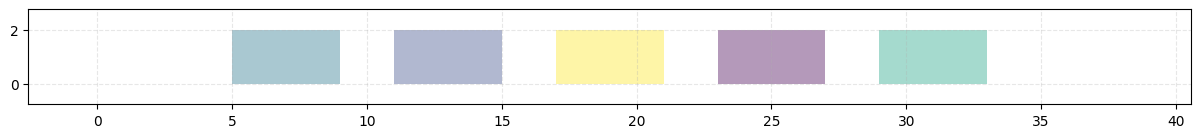

In [521]:
generated_rectangles = itertools.islice(gen_rectangle(), 5)
visualize_polygons(generated_rectangles) 


In [522]:
def gen_triangle(start_x=-10, start_y=0, base=8**0.5, height=2, step_x=4):
    """
    Генерирует бесконечную последовательность непересекающихся треугольников по горизонтали.
    
    Args:
        start_x, start_y: начальные координаты
        base: длина основания треугольника
        height: высота треугольника
        step_x: шаг смещения для следующего треугольника
    """
    x = start_x
    while True:
        points = [(x, start_y),
                 (x + base, start_y),
                 (x + base/2, start_y + height)]
        color = np.random.rand()
        yield (points, color)
        x += step_x


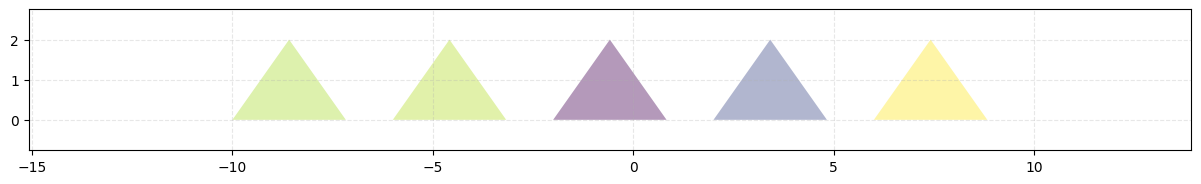

In [523]:
# Создаем и визуализируем ленту треугольников
generated_triangles = itertools.islice(gen_triangle(), 5)
visualize_polygons(generated_triangles) 



In [524]:
def gen_hexagon(start_x=-20, start_y=1.25, radius=1.5, step_x=4):
    """
    Генерирует бесконечную последовательность непересекающихся правильных шестиугольников по горизонтали.
    
    Args:
        start_x, start_y: начальные координаты
        radius: радиус описанной окружности
        step_x: шаг смещения для следующего шестиугольника
    """
    x = start_x
    while True:
        points = []
        for i in range(6):
            angle = i * pi / 3
            px = x + radius * cos(angle)
            py = start_y + radius * sin(angle)
            points.append((px, py))
        
        color = np.random.rand()
        yield (points, color)
        x += step_x

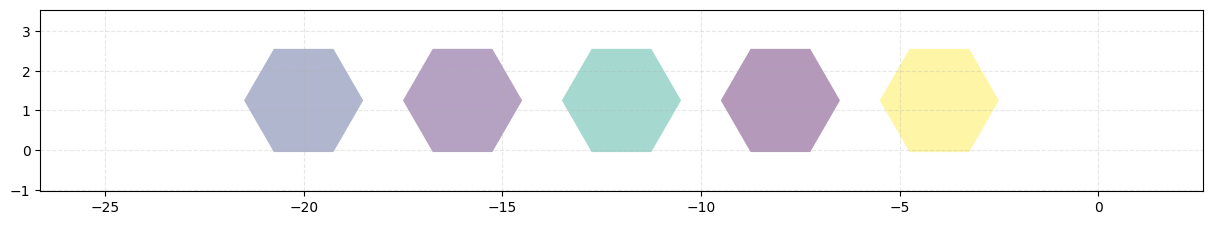

In [525]:

generated_hexagons = itertools.islice(gen_hexagon(), 5)
visualize_polygons(generated_hexagons) 

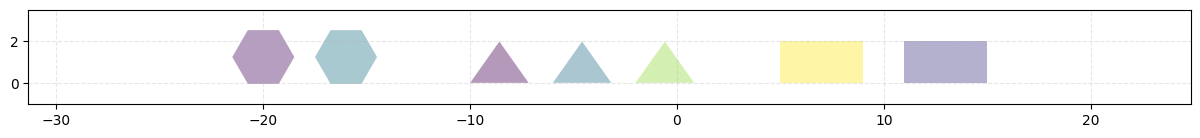

In [526]:
generated_combo = itertools.chain(
        itertools.islice(gen_rectangle(), 2),
        itertools.islice(gen_triangle(), 3),
        itertools.islice(gen_hexagon(), 2)
    )

visualize_polygons(generated_combo)

In [527]:
def tr_translate(points_with_color, dx, dy):
    """
    Параллельный перенос всех точек полигона на вектор (dx, dy).
    
    Args:
        points: список точек полигона в формате [(x1,y1), (x2,y2), ...]
        dx: смещение по оси X
        dy: смещение по оси Y
    
    Returns:
        список точек после переноса
    """
    points, color = points_with_color
    return [(x + dx, y + dy) for x, y in points]

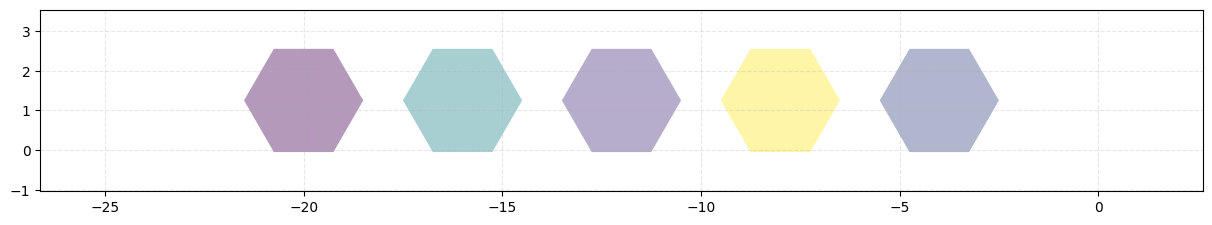

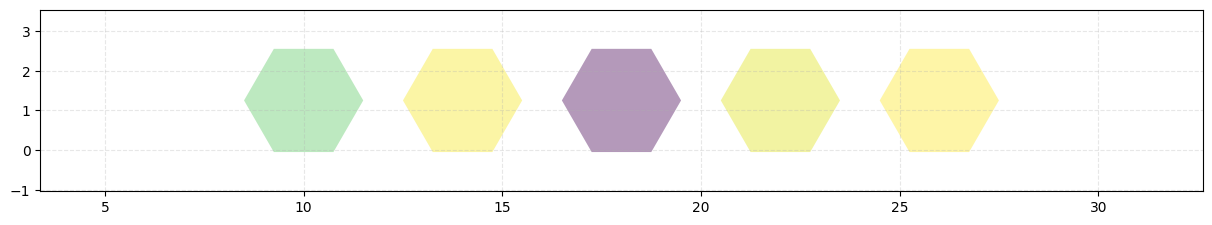

In [528]:

generated_hexagons = itertools.islice(gen_hexagon(), 5)
generated_hexagons_v2 = itertools.islice(gen_hexagon(), 5)
translated_hexagons = [tr_translate(hex, 30, 0) for hex in generated_hexagons_v2]
visualize_polygons(generated_hexagons)
visualize_polygons(translated_hexagons) 

In [529]:
def tr_rotate(points_with_color, angle, center=(0, 0)):
    """
    Поворот всех точек полигона вокруг центра на заданный угол.
    
    Args:
        points: список точек полигона в формате [(x1,y1), (x2,y2), ...]
        angle: угол поворота в радианах
        center: точка, вокруг которой выполняется поворот (по умолчанию (0,0))
    
    Returns:
        список точек после поворота
    """
    points, color = points_with_color
    cx, cy = center
    rotated_points = []
    for x, y in points:
        
        x_rel = x - cx
        y_rel = y - cy
        
        x_rot = x_rel * cos(angle) - y_rel * sin(angle)
        y_rot = x_rel * sin(angle) + y_rel * cos(angle)
        
        rotated_points.append((x_rot + cx, y_rot + cy))
    return rotated_points, color

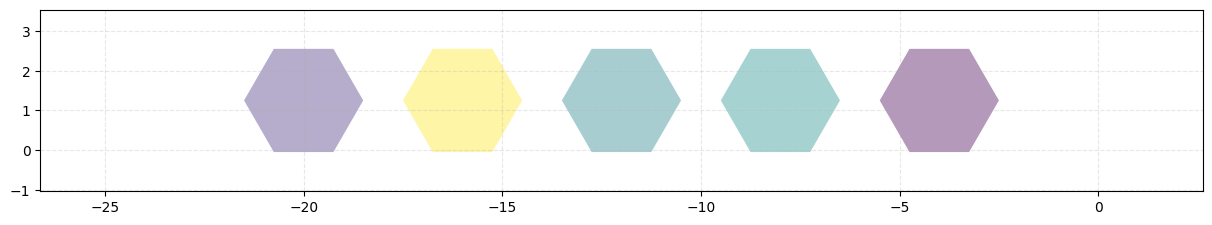

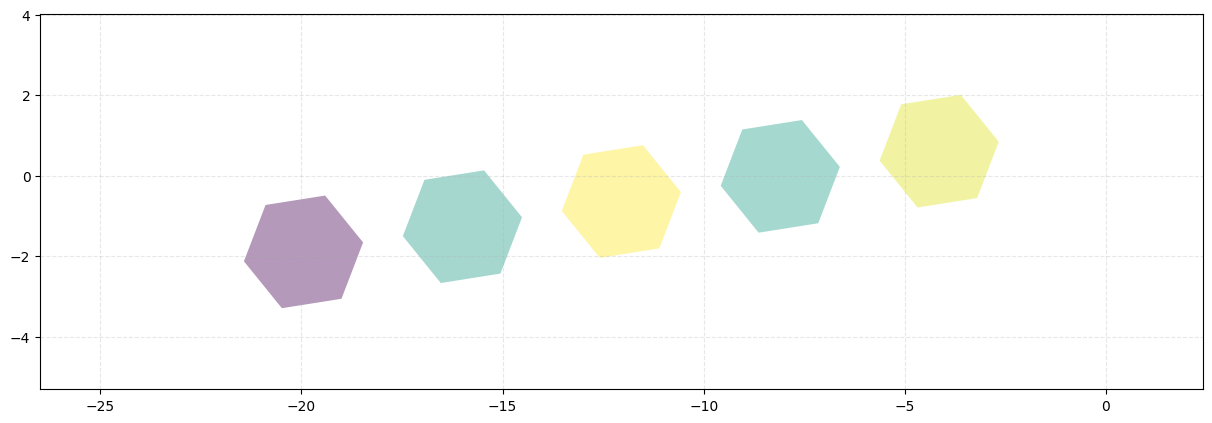

In [530]:
import math
generated_hexagons = itertools.islice(gen_hexagon(), 5)
generated_hexagons_v2 = itertools.islice(gen_hexagon(), 5)
rotated_hexagons = [tr_rotate(hex, math.pi/20) for hex in generated_hexagons_v2]
visualize_polygons(generated_hexagons)
visualize_polygons(rotated_hexagons) 

In [531]:
def tr_symmetry(points_with_color, axis='x'):
    """
    Симметрия относительно оси X или Y.
    
    Args:
        points: список точек полигона в формате [(x1,y1), (x2,y2), ...]
        axis: ось симметрии ('x' или 'y')
    
    Returns:
        список точек после симметрии
    """
    points, color = points_with_color
    if axis == 'x':
        return [(x, -y) for x, y in points], color
    elif axis == 'y':
        return [(-x, y) for x, y in points], color
    else:
        raise ValueError("axis должен быть 'x' или 'y'")

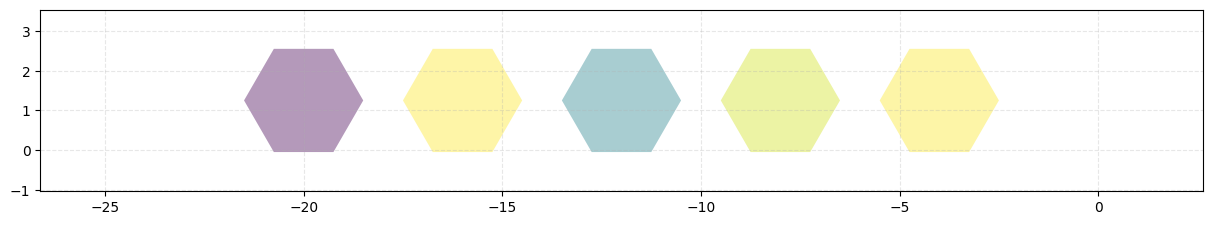

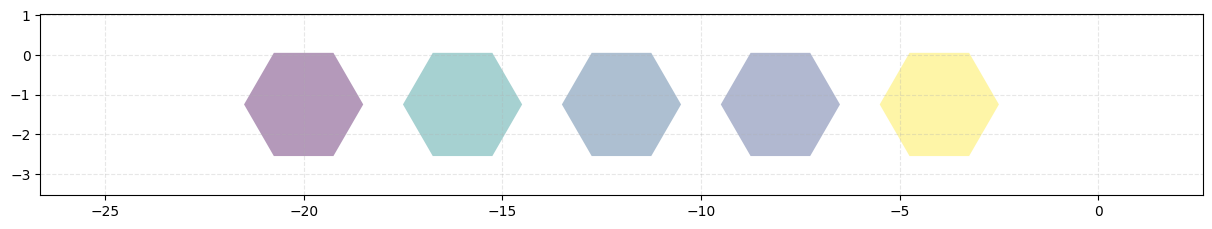

In [532]:
generated_hexagons = itertools.islice(gen_hexagon(), 5)
generated_hexagons_v2 = itertools.islice(gen_hexagon(), 5)
symmetric_hexagons = [tr_symmetry(hex, 'x') for hex in generated_hexagons_v2]
visualize_polygons(generated_hexagons)
visualize_polygons(symmetric_hexagons) 

In [533]:
def tr_homothety(points_with_color, k, center=(0, 0)):
    """
    Гомотетия (масштабирование) относительно центра.
    
    Args:
        points: список точек полигона в формате [(x1,y1), (x2,y2), ...]
        k: коэффициент гомотетии
        center: центр гомотетии (по умолчанию (0,0))
    
    Returns:
        список точек после гомотетии
    """
    points, color = points_with_color
    cx, cy = center
    return [(cx + k * (x - cx), cy + k * (y - cy)) for x, y in points], color


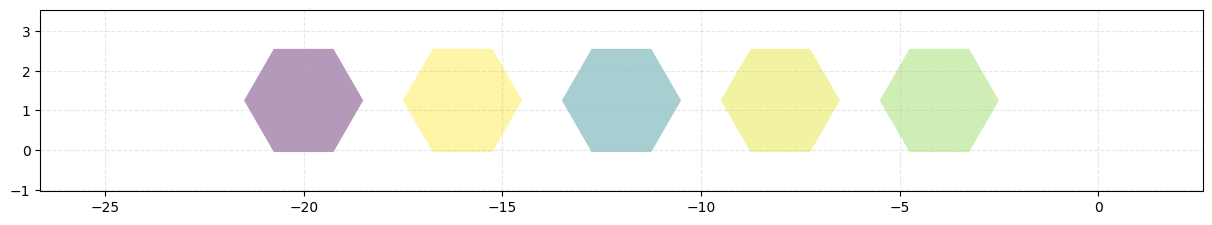

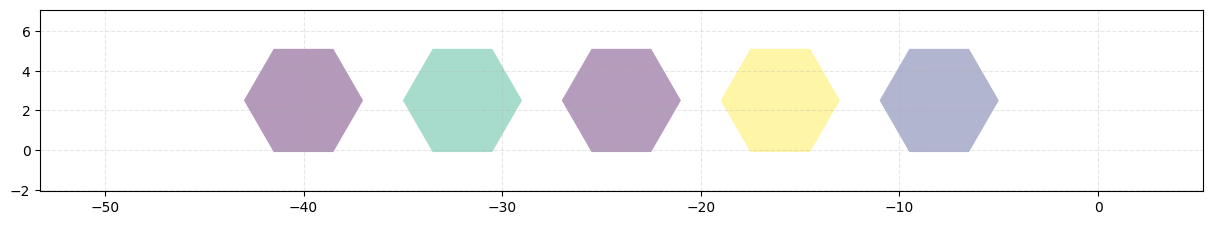

In [534]:
generated_hexagons = itertools.islice(gen_hexagon(), 5)
generated_hexagons_v2 = itertools.islice(gen_hexagon(), 5)
homothety_hexagons = [tr_homothety(hex, 2) for hex in generated_hexagons_v2]
visualize_polygons(generated_hexagons)
visualize_polygons(homothety_hexagons) 

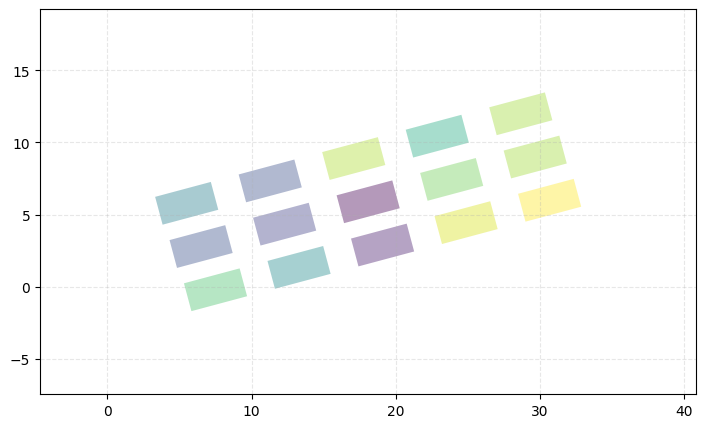

In [535]:
angle = np.deg2rad(15)  
num_rects = 5


rects1 = [tr_rotate(rect, angle) for rect in itertools.islice(gen_rectangle(start_y=0), num_rects)]

rects2 = [tr_translate(tr_rotate(rect, angle), -1, 3) for rect in itertools.islice(gen_rectangle(start_y=0), num_rects)]

rects3 = [tr_translate(tr_rotate(rect, angle), 1, -3) for rect in itertools.islice(gen_rectangle(start_y=0), num_rects)]

visualize_polygons(rects1 + rects2 + rects3)

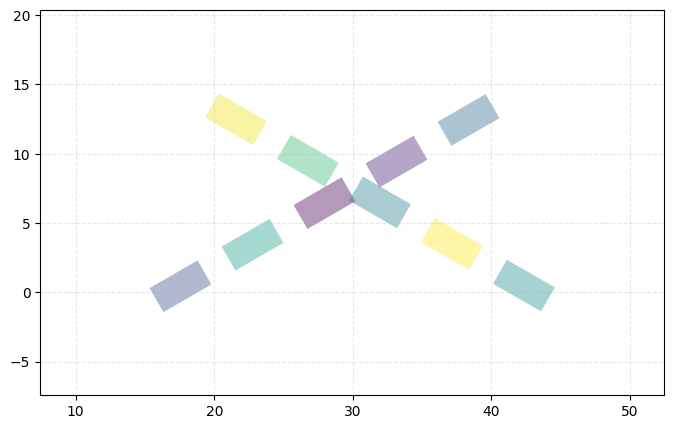

In [536]:
angle1 = np.deg2rad(30)
angle2 = np.deg2rad(-30)
shift = (8, 3)  

rects_a = [tr_translate(tr_rotate(rect, angle1), *shift) for rect in itertools.islice(gen_rectangle(start_y=-8), num_rects)]
rects_b = [tr_translate(tr_rotate(rect, angle2), *shift) for rect in itertools.islice(gen_rectangle(start_y=14), num_rects)]

visualize_polygons(rects_a + rects_b)

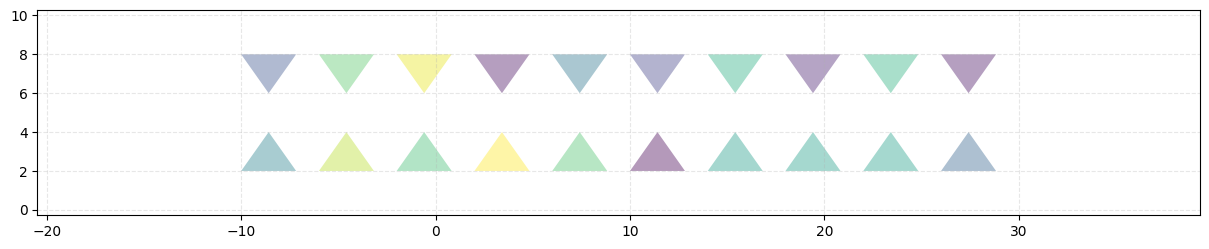

In [537]:
num_tris = 10

tris_up = [tr_translate(tri, 0, 2) for tri in itertools.islice(gen_triangle(start_y=0), num_tris)]

tris_down = [tr_translate(tr_symmetry(tri, axis='x'), 0, 8) for tri in itertools.islice(gen_triangle(start_y=0), num_tris)]

visualize_polygons(tris_up + tris_down)

In [538]:
def is_convex(points):
    def cross(a, b, c):
        return (b[0]-a[0])*(c[1]-a[1]) - (b[1]-a[1])*(c[0]-a[0])
    n = len(points)
    if n < 3:
        return False
    sign = None
    for i in range(n):
        z = cross(points[i], points[(i+1)%n], points[(i+2)%n])
        if z != 0:
            if sign is None:
                sign = z > 0
            elif (z > 0) != sign:
                return False
    return True

def flt_convex_polygon(polygons):
    return [item for item in polygons if is_convex(item[0])]

In [539]:
def flt_angle_point(polygons, point):
    return [item for item in polygons if any(np.allclose(vertex, point) for vertex in item[0])]

In [540]:
def polygon_area(points):
    n = len(points)
    area = 0
    for i in range(n):
        x1, y1 = points[i]
        x2, y2 = points[(i+1)%n]
        area += x1*y2 - x2*y1
    return abs(area) / 2

def flt_square(polygons, min_area):
    return [item for item in polygons if polygon_area(item[0]) < min_area]

In [541]:
def min_side_length(points):
    n = len(points)
    return min(np.hypot(points[i][0]-points[(i+1)%n][0], points[i][1]-points[(i+1)%n][1]) for i in range(n))

def flt_short_side(polygons, min_length):
    return [item for item in polygons if min_side_length(item[0]) < min_length]

In [542]:
def flt_polygon_angles_inside(polygons, test_polygon):
    return [
        item for item in polygons
        if is_convex(item[0]) and any(Path(item[0]).contains_point(vertex) for vertex in test_polygon)
    ]

In [543]:

hexagons = list(itertools.islice(gen_hexagon(), 2))
rectangles = list(itertools.islice(gen_rectangle(start_x=0), 3))
triangles = list(itertools.islice(gen_triangle(), 2))
all_polygons = hexagons + rectangles + triangles

Выпуклых: 7


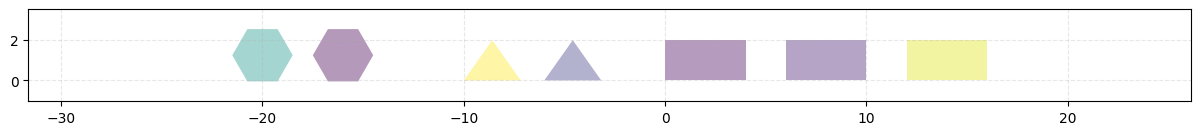

In [544]:
convex_polys = flt_convex_polygon(all_polygons)
print(f"Выпуклых: {len(convex_polys)}")
visualize_polygons(convex_polys)

С вершиной в (0,0): 1


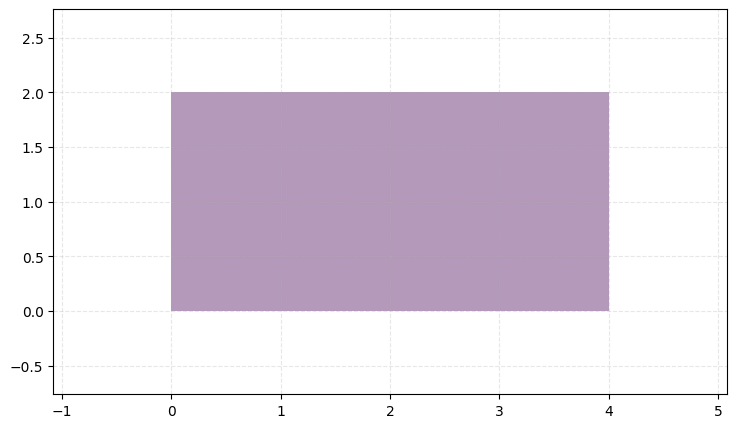

In [545]:
angle_point_polys = flt_angle_point(all_polygons, (0, 0))
print(f"С вершиной в (0,0): {len(angle_point_polys)}")
visualize_polygons(angle_point_polys)

Площадь < 3: 2


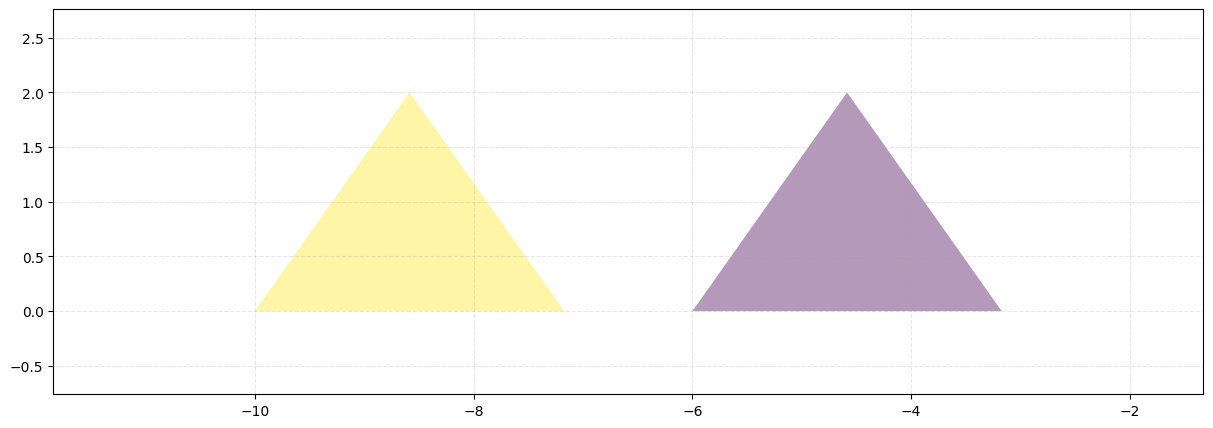

In [546]:
small_area_polys = flt_square(all_polygons, 3)
print(f"Площадь < 3: {len(small_area_polys)}")
visualize_polygons(small_area_polys)

Кратчайшая сторона < 2: 2


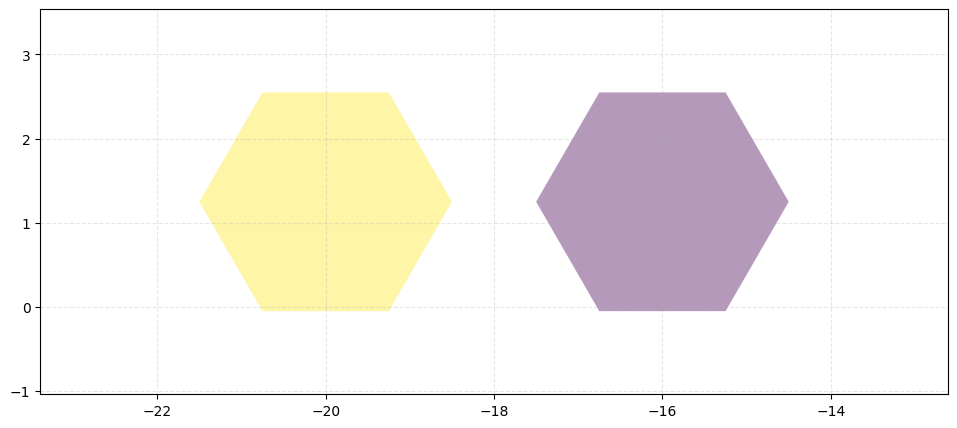

In [547]:
short_side_polys = flt_short_side(all_polygons, 2)
print(f"Кратчайшая сторона < 2: {len(short_side_polys)}")
visualize_polygons(short_side_polys)

Выпуклые, включающие угол из test_poly: 1


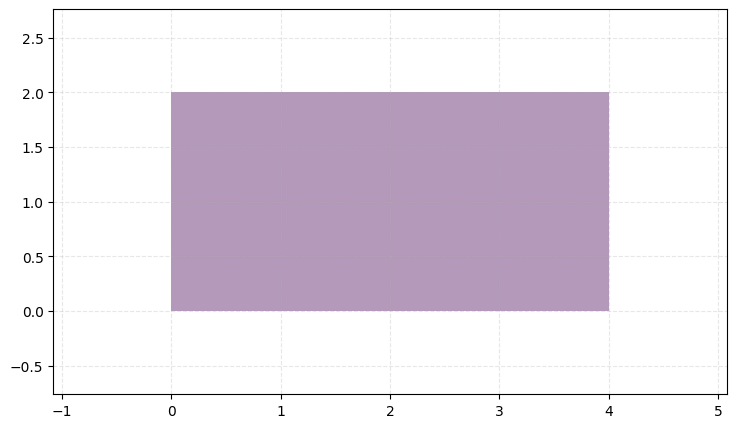

In [548]:
test_poly = [(0,0), (1,0), (1,1), (0,1)]  
angles_inside_polys = flt_polygon_angles_inside(all_polygons, test_poly)
print(f"Выпуклые, включающие угол из test_poly: {len(angles_inside_polys)}")
visualize_polygons(angles_inside_polys)